**ogs@jupyter-lab: C process: U(6) Transport-sorption Process**

<table><tr>
<td> <img src="../ogs-workflows.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="../icross-logo-ok.png" alt="Drawing" style="width: 100px;"/> </td>
</tr></table>

**Model #1: Chemical calculations by calling Phreeqc during the runtime**

In [2]:
from ogs6py import ogs

print("===============")
print(">>> run ogs <<<")

model = ogs.OGS(PROJECT_FILE="./full_coupling/RadionuclideSorption.prj")
model.run_model(args="-o ./full_coupling")

>>> run ogs <<<
OGS finished with project file ./full_coupling/RadionuclideSorption.prj.
Execution took 21.47495722770691 s


>>> print results <<<


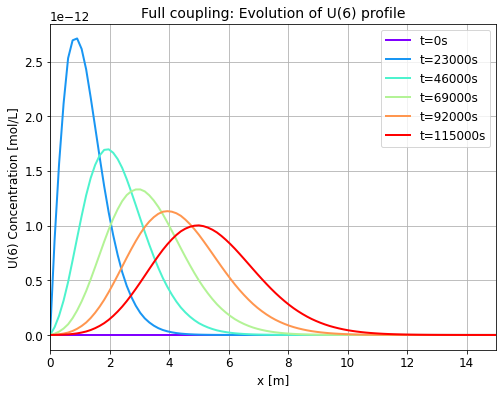

In [3]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.style.use('../notebook.mplstyle')
print("=====================")
print(">>> print results <<<")

pvdfile=vtuIO.PVDIO("./full_coupling/RadionuclideSorption_full_coupling.pvd", dim=1)

xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=15, num=100)]
r_x = np.array(xaxis)[:,0]
time = [0,23000,46000,69000,92000,115000]

color=iter(cm.rainbow(np.linspace(0,1,len(time))))
for t, color in zip(time, color):
    function_xaxis_t = pvdfile.read_set_data(t, 'U(6)', pointsetarray=xaxis)
    plt.plot(r_x, function_xaxis_t/1000, label='t={}s'.format(t), color=color)
    
plt.title("Full coupling: Evolution of U(6) profile")
#plt.xscale('log')
plt.xlim(0,15)
plt.xlabel('x [m]')
plt.ylabel('U(6) Concentration [mol/L]')

plt.legend()
plt.grid()

#plt.savefig("profile_phreeqc_coupling.png")
plt.show()

**Model #2: Chemical calculation by the look-up table approach.**
**This simulation is performed along with a sparse look-up table.**

In [4]:
print("===============")
print(">>> run ogs <<<")

model = ogs.OGS(PROJECT_FILE="./sparse_lookup_table/RadionuclideSorption.prj")
model.run_model(args="-o ./sparse_lookup_table")

>>> run ogs <<<
OGS finished with project file ./sparse_lookup_table/RadionuclideSorption.prj.
Execution took 0.4388008117675781 s


>>> print results <<<


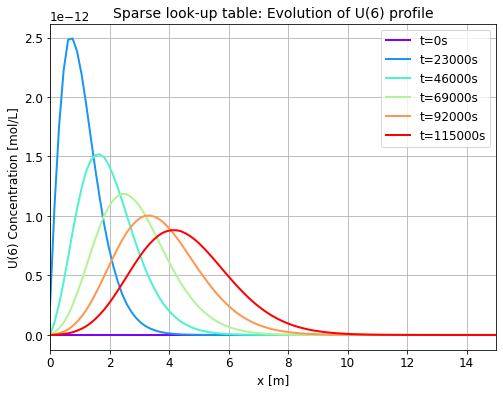

In [5]:
print("=====================")
print(">>> print results <<<")

pvdfile=vtuIO.PVDIO("./sparse_lookup_table/RadionuclideSorption_sparse_table.pvd", dim=1)

xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=15, num=100)]
r_x = np.array(xaxis)[:,0]
time = [0,23000,46000,69000,92000,115000]

color=iter(cm.rainbow(np.linspace(0,1,len(time))))
for t, color in zip(time, color):
    function_xaxis_t = pvdfile.read_set_data(t, 'U(6)', pointsetarray=xaxis)
    plt.plot(r_x, function_xaxis_t/1000, label='t={}s'.format(t), color=color)
    
plt.title("Sparse look-up table: Evolution of U(6) profile")
#plt.xscale('log')
plt.xlim(0,15)
plt.xlabel('x [m]')
plt.ylabel('U(6) Concentration [mol/L]')

plt.legend()
plt.grid()

#plt.savefig("profile_sparse_table.png")
plt.show()

**Model #3: Chemical calculation by the look-up table approach.**
**This simulation is performed along with a more dense look-up table.**

In [6]:
print("===============")
print(">>> run ogs <<<")

model = ogs.OGS(PROJECT_FILE="./dense_lookup_table/RadionuclideSorption.prj")
model.run_model(args="-o ./dense_lookup_table")

>>> run ogs <<<
OGS finished with project file ./dense_lookup_table/RadionuclideSorption.prj.
Execution took 0.49854373931884766 s


>>> print results <<<


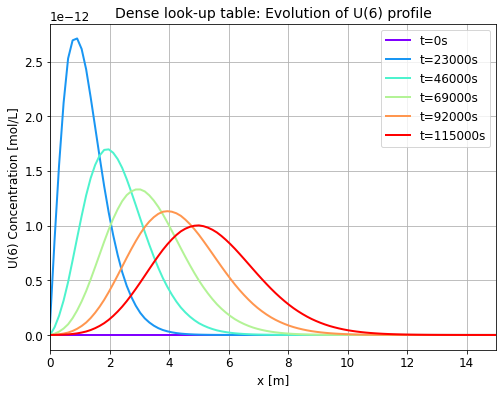

In [8]:
print("=====================")
print(">>> print results <<<")

pvdfile=vtuIO.PVDIO("./dense_lookup_table/RadionuclideSorption_dense_table.pvd", dim=1)

xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=15, num=100)]
r_x = np.array(xaxis)[:,0]
time = [0,23000,46000,69000,92000,115000]

color=iter(cm.rainbow(np.linspace(0,1,len(time))))
for t, color in zip(time, color):
    function_xaxis_t = pvdfile.read_set_data(t, 'U(6)', pointsetarray=xaxis)
    plt.plot(r_x, function_xaxis_t/1000, label='t={}s'.format(t), color=color)
    
plt.title("Dense look-up table: Evolution of U(6) profile")
#plt.xscale('log')
plt.xlim(0,15)
plt.xlabel('x [m]')
plt.ylabel('U(6) Concentration [mol/L]')

plt.legend()
plt.grid()

#plt.savefig("profile_dense_table.png")
plt.show()

**Comparison of different approaches in terms of U(6) profile**

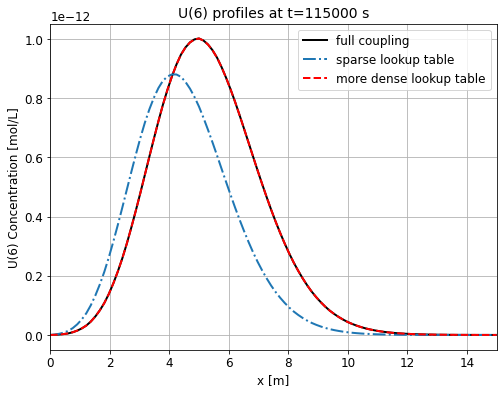

In [9]:
pvd_full_coupling=vtuIO.PVDIO("./full_coupling/RadionuclideSorption_full_coupling.pvd", dim=1)
pvd_sparse_table=vtuIO.PVDIO("./sparse_lookup_table/RadionuclideSorption_sparse_table.pvd", dim=1)
pvd_dense_table=vtuIO.PVDIO("./dense_lookup_table/RadionuclideSorption_dense_table.pvd", dim=1)

xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=15, num=100)]
r_x = np.array(xaxis)[:,0]

time = 115000

func_full_coupling = pvd_full_coupling.read_set_data(time, 'U(6)', pointsetarray=xaxis)
func_sparse_table = pvd_sparse_table.read_set_data(time, 'U(6)', pointsetarray=xaxis)
func_dense_table = pvd_dense_table.read_set_data(time, 'U(6)', pointsetarray=xaxis)

plt.plot(r_x, func_full_coupling/1000, label='full coupling', color='k')
plt.plot(r_x, func_sparse_table/1000, label='sparse lookup table', linestyle='-.')
plt.plot(r_x, func_dense_table/1000, label='more dense lookup table', linestyle='--', color='r')

title_str="U(6) profiles at t={} s".format(time)
plt.title(title_str)

#plt.xscale('log')
plt.xlim(0,15)
plt.xlabel('x [m]')
plt.ylabel('U(6) Concentration [mol/L]')

plt.legend()
plt.grid()

#plt.savefig("profile_dense_table.png")
plt.show()

**OGS links**
- notebook draft by OK: https://github.com/OlafKolditz/ogs-jupyter-lab

**Credits**
- Renchao Lu for this benchmark set up
- Jörg Buchwald for ogs6py and VTUInterface (https://joss.theoj.org/papers/6ddcac13634c6373e6e808952fdf4abc)
- Frameworks acknowledgements: OGS, Python, Jupyter, matplotlib